In [122]:
from data_storage import create_connection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from stockstats import StockDataFrame
#from pandas_profiling import ProfileReport

In [123]:
connection = create_connection("../database/crypto_billionairs.db")

In [124]:
df = pd.read_sql_query('select * from ETHUSDT_5m_complete_history', connection)

In [125]:
df.head()

,open time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1614556800000,1418.67,1428.17,1413.67,1414.77,4215.99347,1614557099999,5.995735e+06,4823,2090.04231,2.971696e+06,0
1,1614557100000,1414.77,1419.19,1409.91,1418.00,3775.48739,1614557399999,5.336616e+06,3855,2122.55630,2.999792e+06,0
2,1614557400000,1418.25,1422.00,1413.43,1421.99,2609.36133,1614557699999,3.696866e+06,2616,1341.07103,1.899618e+06,0
3,1614557700000,1422.00,1445.68,1421.58,1444.94,10711.71757,1614557999999,1.540127e+07,8424,5923.97507,8.518624e+06,0
4,1614558000000,1444.37,1448.59,1437.58,1442.60,4730.57675,1614558299999,6.828998e+06,4915,1962.46672,2.833183e+06,0


In [126]:
df["return"] = df['close'].pct_change() + 1 

In [127]:
#prof = ProfileReport(df)
#prof.to_file(output_file='data_profile.html')

No handles with labels found to put in legend.


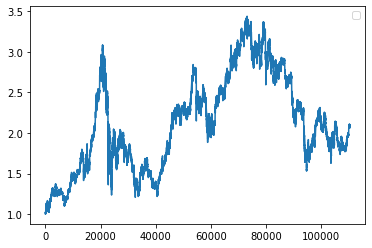

In [128]:
# Plot indexed returns.
plt.plot(np.cumprod(df["return"]))
plt.legend()
plt.show()

In [129]:
df.head()

,open time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,return
0,1614556800000,1418.67,1428.17,1413.67,1414.77,4215.99347,1614557099999,5.995735e+06,4823,2090.04231,2.971696e+06,0,NaN
1,1614557100000,1414.77,1419.19,1409.91,1418.00,3775.48739,1614557399999,5.336616e+06,3855,2122.55630,2.999792e+06,0,1.002283
2,1614557400000,1418.25,1422.00,1413.43,1421.99,2609.36133,1614557699999,3.696866e+06,2616,1341.07103,1.899618e+06,0,1.002814
3,1614557700000,1422.00,1445.68,1421.58,1444.94,10711.71757,1614557999999,1.540127e+07,8424,5923.97507,8.518624e+06,0,1.016139
4,1614558000000,1444.37,1448.59,1437.58,1442.60,4730.57675,1614558299999,6.828998e+06,4915,1962.46672,2.833183e+06,0,0.998381


In [130]:
df_ti = pd.DataFrame()
df_ti["open_time"] = df["open time"]
df_ti["open"] = df["open"]
df_ti["close"] = df["close"]
df_ti["high"] = df["high"]
df_ti["low"] = df["low"]
df_ti["volume"] = df["volume"]
df_ti["amount"] = df["quote_asset_volume"]

In [131]:
stock = StockDataFrame.retype(df_ti)

In [132]:
df["stochastic_oscillator"] = stock.get("kdjk")
df["relative_strength_index"] = stock.get("rsi_30")

### Different momentum analysis

In [133]:
def momentum(df, lag):
    return df.pct_change(periods=lag)

In [134]:
# 1 Hour Momentum
df["momentum1"] = momentum(df["close"], 12)
# 2 Hour Momentum
df["momentum2"] = momentum(df["close"], 24)
# 4 Hour Momentum
df["momentum4"] = momentum(df["close"], 48)
# 8 Hour Momentum
df["momentum8"] = momentum(df["close"], 96)
# 12 Hour Momentum
df["momentum12"] = momentum(df["close"], 144)
# 1 Day Momentum
df["momentum24"] = momentum(df["close"], 288)
# 2 Day Momentum
df["momentum48"] = momentum(df["close"], 576)
# 4 Day Momentum
df["momentum96"] = momentum(df["close"], 1152)
# 1 Week Momentum
df["momentum168"] = momentum(df["close"], 2016)

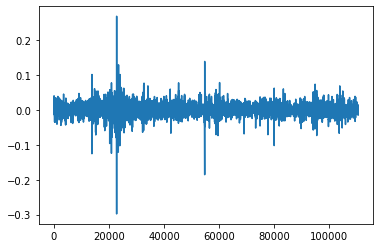

In [135]:
plt.plot(df["momentum1"])
plt.show()

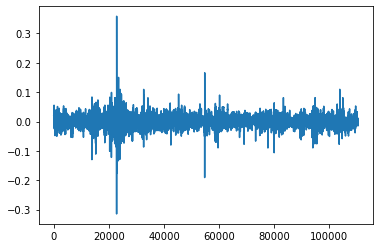

In [136]:
plt.plot(df["momentum2"])
plt.show()

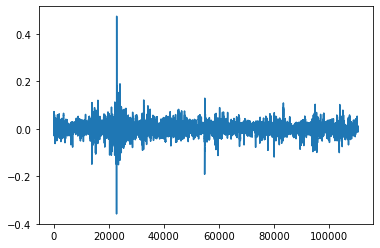

In [137]:
plt.plot(df["momentum4"])
plt.show()

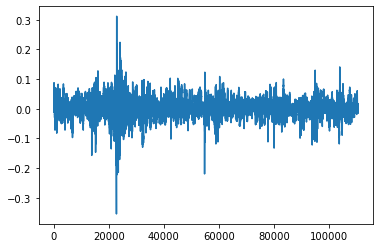

In [138]:
plt.plot(df["momentum8"])
plt.show()

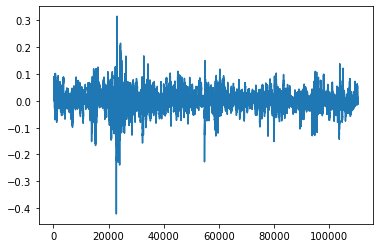

In [139]:
plt.plot(df["momentum12"])
plt.show()

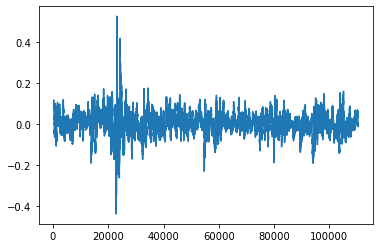

In [140]:
plt.plot(df["momentum24"])
plt.show()

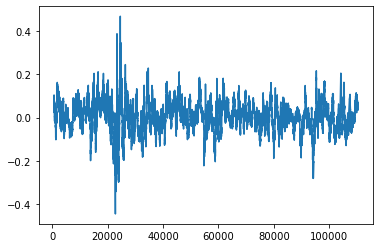

In [141]:
plt.plot(df["momentum48"])
plt.show()

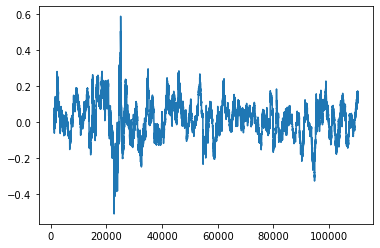

In [142]:
plt.plot(df["momentum96"])
plt.show()

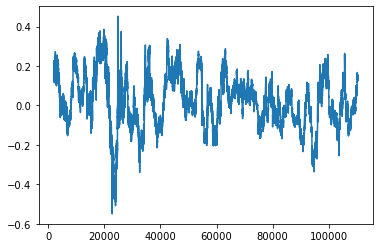

In [143]:
plt.plot(df["momentum168"])
plt.show()

### Stochastic Oscialltor and Relative Strength Index as baseline

#### Generating Buying Signals

In [146]:
df["so_group"] = df["stochastic_oscillator"].astype(str).str[0]
df["rsi_group"] = df["relative_strength_index"].astype(str).str[0]

In [147]:
pd.crosstab(df["so_group"], df["rsi_group"])

rsi_group,1,2,3,4,5,6,7,8,9,n
so_group,,,,,,,,,,
1,11,434,2743,4374,980,30,0,0,0,0
2,3,173,2563,8368,3469,198,0,0,0,0
3,1,57,1565,7610,5122,427,0,0,0,1
4,1,15,823,6031,5897,671,14,0,0,0
5,0,8,579,5421,6820,1017,30,0,0,0
6,2,15,396,4710,8529,1731,75,0,0,0
7,0,19,210,3698,9188,2790,230,2,1,0
8,1,26,125,1608,5987,3217,606,8,0,0
9,2,33,148,187,583,588,232,7,0,0


In [148]:
df["technical_indicators"] = df["so_group"] + "/" + df["rsi_group"]

In [536]:
df_momentum168 = pd.DataFrame()
df_momentum168["technical_indicators"] = df["technical_indicators"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_momentum168.groupby("technical_indicators").median().where(df_momentum168.groupby("technical_indicators").median() >= 0.1))

,momentum168
technical_indicators,
1/1,0.106590
1/2,NaN
1/3,NaN
1/4,NaN
1/5,NaN
1/6,NaN
2/1,0.120484
2/2,NaN
2/3,NaN


#### Generating selling Signals

In [334]:
#Here we tried to set a sell signal if the return to the previous 7 days is below -12%
df_momentum168 = pd.DataFrame()
df_momentum168["technical_indicators"] = df["technical_indicators"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
sell_signals_raw = df.index.where(df["momentum168"] < - 0.12).to_list()
sell_signals = [int(x) for x in sell_signals_raw if str(x) != "nan"]

In [377]:
#lets try the same with 4 days
df_momentum96 = pd.DataFrame()
df_momentum96["technical_indicators"] = df["technical_indicators"].shift(1152)
df_momentum96["momentum96"] = df["momentum96"]
sell_signals_raw = df.index.where(df["momentum168"] < - 0.1).to_list()
sell_signals = [int(x) for x in sell_signals_raw if str(x) != "nan"]

In [565]:
# df_momentum168 = pd.DataFrame()
# df_momentum168["technical_indicators"] = df["technical_indicators"].shift(2016)
# df_momentum168["momentum168"] = df["momentum168"]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(df_momentum168.groupby("technical_indicators").median().where(df_momentum168.groupby("technical_indicators").median() < 0))

### RSI Only Analysis

In [379]:
df_momentum168 = pd.DataFrame()
df_momentum168["rsi_group"] = df["rsi_group"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
df_momentum168.groupby("rsi_group").mean()

,momentum168
rsi_group,
1,0.139349
2,0.019212
3,0.014206
4,0.018827
5,0.017866
6,0.026243
7,0.038999
8,0.078714
9,0.203868


### Backtesting (Long-Only) - Calculate the returns by applying basic rules

In [380]:
df.head()

,open time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,...,momentum12,momentum24,momentum48,momentum96,momentum168,so_group,rsi_group,technical_indicators,buy_indicator,sell_indicator
0,1614556800000,1418.67,1428.17,1413.67,1414.77,4215.99347,1614557099999,5.995735e+06,4823,2090.04231,...,NaN,NaN,NaN,NaN,NaN,3,n,3/n,0,0
1,1614557100000,1414.77,1419.19,1409.91,1418.00,3775.48739,1614557399999,5.336616e+06,3855,2122.55630,...,NaN,NaN,NaN,NaN,NaN,3,1,3/1,1,0
2,1614557400000,1418.25,1422.00,1413.43,1421.99,2609.36133,1614557699999,3.696866e+06,2616,1341.07103,...,NaN,NaN,NaN,NaN,NaN,4,1,4/1,1,0
3,1614557700000,1422.00,1445.68,1421.58,1444.94,10711.71757,1614557999999,1.540127e+07,8424,5923.97507,...,NaN,NaN,NaN,NaN,NaN,6,1,6/1,1,0
4,1614558000000,1444.37,1448.59,1437.58,1442.60,4730.57675,1614558299999,6.828998e+06,4915,1962.46672,...,NaN,NaN,NaN,NaN,NaN,7,9,7/9,1,0


In [556]:
#lets build an example of 1 week momentum and see when our indicators appear
df["buy_indicator"] = 0
df.loc[df["technical_indicators"] == "1/1", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "2/1", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "3/1", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "4/1", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "5/7", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "6/1", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "7/8", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "7/9", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "8/1", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "9/8", 'buy_indicator'] = 1

In [557]:
df["sell_indicator"] = 0
df.loc[df["technical_indicators"].shift(2016) == "1/1", 'sell_indicator'] = 1
df.loc[df["technical_indicators"].shift(2016) == "2/1", 'sell_indicator'] = 1
df.loc[df["technical_indicators"].shift(2016) == "3/1", 'sell_indicator'] = 1
df.loc[df["technical_indicators"].shift(2016) == "4/1", 'sell_indicator'] = 1
df.loc[df["technical_indicators"].shift(2016) == "5/7", 'sell_indicator'] = 1
df.loc[df["technical_indicators"].shift(2016) == "6/1", 'sell_indicator'] = 1
df.loc[df["technical_indicators"].shift(2016) == "7/8", 'sell_indicator'] = 1
df.loc[df["technical_indicators"].shift(2016) == "7/9", 'sell_indicator'] = 1
df.loc[df["technical_indicators"].shift(2016) == "8/1", 'sell_indicator'] = 1
df.loc[df["technical_indicators"].shift(2016) == "9/8", 'sell_indicator'] = 1


In [558]:
buy_colors = []
for value in df["buy_indicator"]:
    if value == 1:
        buy_colors.append("r")
    else:
        buy_colors.append("None")

In [559]:
sell_colors = []
for value in df["sell_indicator"]:
    if value == 1:
        sell_colors.append("g")
    else:
        sell_colors.append("None")

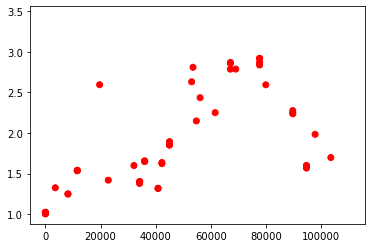

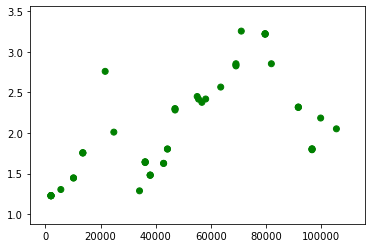

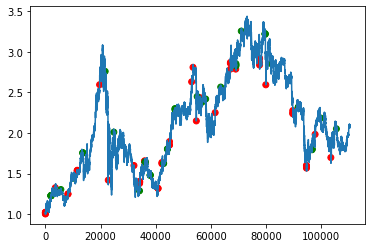

In [560]:
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.plot(np.cumprod(df["return"]))
plt.show()

In [561]:
def calculate_cumulated_return(df, start_sum):

    money = start_sum
    money_history = []
    sell_index = 0

    for index, row in df[['close', 'buy_indicator', 'sell_indicator']].iterrows():
        

        if row["buy_indicator"] == 1 and money != 0 and index > sell_index:
            assets = money / row["close"]
            money = 0
            buy_index = index
            sell_index = buy_index + 2015

        if sell_index == index and money == 0: 
            money = assets * df["close"][sell_index]
            money_history.append(money / start_sum)
            assets = 0

        
        if len(df) - 1 == index and assets != 0:
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

    return money / start_sum, money_history

result, hist = calculate_cumulated_return(df, 1000000)

In [562]:
print(max(hist))

6.928957443629086


In [563]:
print(result)

6.928957443629086


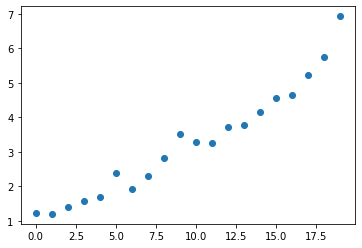

In [564]:
plt.scatter(list(range(len(hist))), hist)
plt.show()

In [566]:
df.to_sql("ETHUSDT_5m_complete_history_long", connection)

C:\Users\janfa\Anaconda3\lib\site-packages\pandas\core\generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [390]:
#sharp ratio, sortino ratio, maximum drawdown, carl mar ratio 

#last value predictor

#### Backtesting (Long-Short) - Calculate the return applying basic rules

In [577]:
#lets build an example of 1 week momentum and see when our indicators appear
df["buy_indicator"] = 0
buy_indicators = ["1/1", "2/1", "3/1", "4/1", "5/7", "6/1", "7/8", "7/9", "8/1", "9/8"]
for buy_indicator in buy_indicators:
    df.loc[df["technical_indicators"] == buy_indicator, 'buy_indicator'] = 1

In [578]:
# df["sell_indicator"] = 0
# sell_indicators = ["5/1", "6/1", "7/1", "0/2", "0/3", "9/8", "0/3"]
                   
# for sell_indicator in sell_indicators:
#     df.loc[df["technical_indicators"].shift(288) == sell_indicator, 'sell_indicator'] = 1

In [579]:
#lets try the same with 2 days
df_momentum48 = pd.DataFrame()
df_momentum48["technical_indicators"] = df["technical_indicators"].shift(576)
df_momentum48["momentum48"] = df["momentum48"]
sell_signals_raw = df.index.where(df["momentum48"] < - 0.105).to_list()
sell_signals = [int(x) for x in sell_signals_raw if str(x) != "nan"]

In [580]:
df["sell_indicator"] = 0
df["sell_indicator"].iloc[sell_signals] = 1

In [581]:
buy_colors = []
for value in df["buy_indicator"]:
    if value == 1:
        buy_colors.append("r")
    else:
        buy_colors.append("None")

In [582]:
sell_colors = []
for value in df["sell_indicator"]:
    if value == 1:
        sell_colors.append("g")
    else:
        sell_colors.append("None")

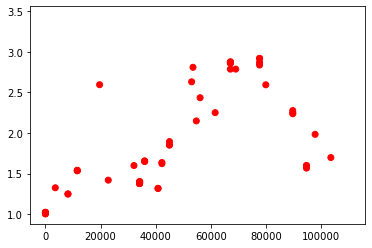

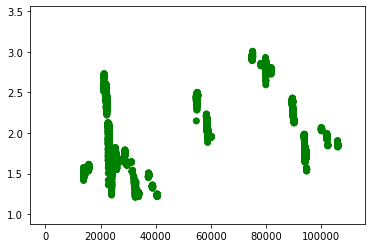

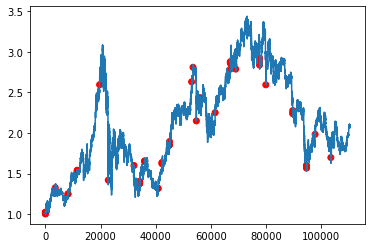

In [583]:
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.plot(np.cumprod(df["return"]))
plt.show()

In [584]:
def calculate_cumulated_return(df, start_sum):

    money = start_sum
    money_history = []

    for index, row in df[['close', 'buy_indicator', 'sell_indicator']].iterrows():
        

        if row["buy_indicator"] == 1 and money != 0:
            assets = money / row["close"]
            money = 0
            

        if row["sell_indicator"] == 1 and money == 0: 
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

        
        if len(df) - 1 == index and assets != 0:
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

    return money / start_sum, money_history

result, hist = calculate_cumulated_return(df, 1000000)

In [585]:
print(max(hist))

3.465805839016292


In [586]:
print(result)

3.465805839016292


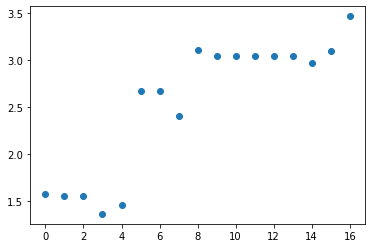

In [587]:
plt.scatter(list(range(len(hist))), hist)
plt.show()

In [589]:
df.to_sql("ETHUSDT_5m_complete_history_long_short", connection, if_exists="replace")

C:\Users\janfa\Anaconda3\lib\site-packages\pandas\core\generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(
